In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [5]:
missing_values = data.isnull()

# Step 3: Summarize Missing Values
missing_count = missing_values.sum()

# Print summary of missing values
print("Missing values summary:")
print(missing_count)

Missing values summary:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# Define your features (independent variables) and target (dependent variable)
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = ["Type"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 171 samples
Test set size: 43 samples


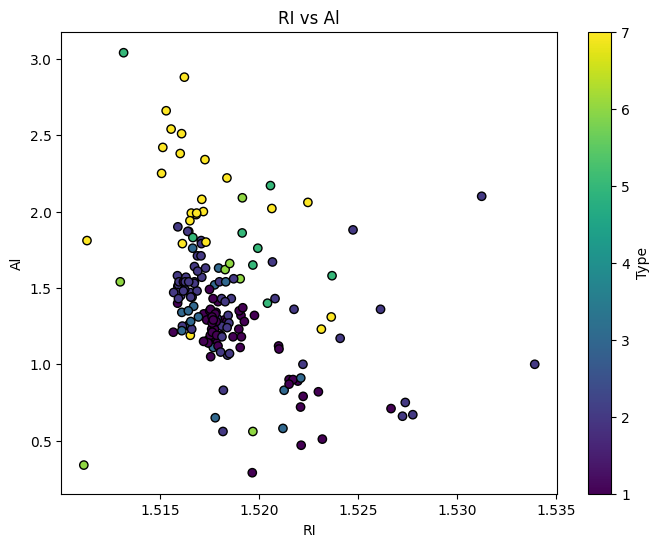

In [8]:
import matplotlib.pyplot as plt

# Define the indices of the features you want to compare
feature1_index = 0  # Choose the index of the first feature
feature2_index = 3  # Choose the index of the second feature

# Create scatter plot for the selected pair of features
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(X_train.iloc[:, feature1_index], X_train.iloc[:, feature2_index], c=y_train.values.ravel(), cmap='viridis', edgecolors='black')
plt.xlabel(features[feature1_index])  # Set x-axis label
plt.ylabel(features[feature2_index])  # Set y-axis label
plt.title(f"{features[feature1_index]} vs {features[feature2_index]}")  # Set the title
plt.colorbar(label=target[0])  # Add colorbar with target label
plt.show()


In [9]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [10]:
y_pred_test = knn.predict(X_test)

y_pred_test

array([7, 1, 1, 1, 1, 3, 2, 2, 1, 5, 2, 2, 6, 2, 6, 1, 2, 1, 2, 7, 7, 1,
       2, 5, 2, 1, 1, 1, 1, 2, 5, 7, 2, 3, 2, 2, 1, 2, 7, 1, 5, 7, 2])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.79      0.73      0.76        15
           2       0.87      0.87      0.87        15
           3       0.00      0.00      0.00         1
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         2
           7       0.83      1.00      0.91         5

    accuracy                           0.81        43
   macro avg       0.75      0.73      0.74        43
weighted avg       0.84      0.81      0.82        43



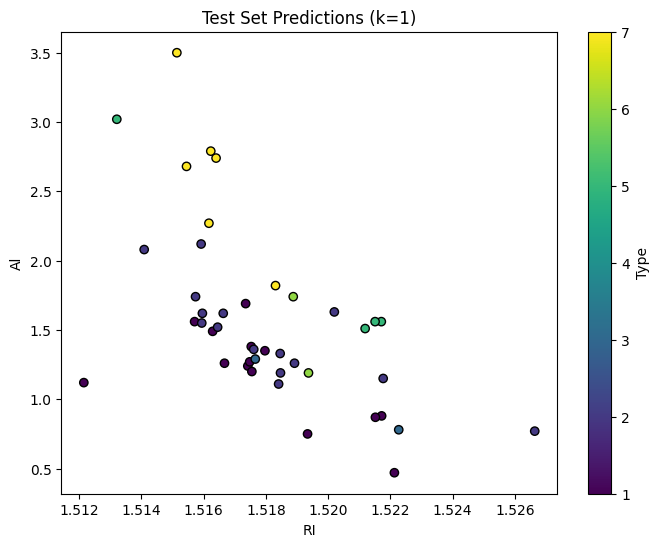

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Fit k-NN model with k=1 to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to avoid DataConversionWarning

# Predict target variable for the test set
y_pred = knn.predict(X_test)

# Create scatter plot of the test set with predicted values
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(X_test.iloc[:, feature1_index], X_test.iloc[:, feature2_index], c=y_pred, cmap='viridis', edgecolors='black')
plt.xlabel(features[0])  # Set x-axis label
plt.ylabel(features[3])  # Set y-axis label
plt.title(f"Test Set Predictions (k=1)")  # Set the title
plt.colorbar(label=target[0])  # Add colorbar with target label
plt.show()
